## Original Author
Programmed by Liu Sida\
Reference: https://github.com/liusida/Google-Scholar-Trends/blob/master/Google-Scholar-Trends.ipynb
## Improvement Author
Programmed by Ziyuan Huang

## Notice
This code is designed to be used under browser's private mode

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests, time, pickle
# from bs4 import BeautifulSoup as soup
from IPython.core.display import display, HTML
from datetime import datetime
import random
import pandas as pd
import os
from fake_useragent import UserAgent
import browser_cookie3

def html(h):
    display(HTML(h))

def merge_dict(dict1, dict2): 
    dicts = {**dict1, **dict2} 
    return dicts

url = 'https://scholar.google.com/'
ua = UserAgent()
user_agent = ua.firefox
user_agent

In [2]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0"
user_agent

'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0'

In [3]:
headers_template = {'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
 'Accept-Encoding': 'gzip, deflate, br',
 'Accept-Language': 'en-US,en;q=0.5',
 'Connection': 'keep-alive',
 'Cookie': 'NID=204=CStrJ5gNdpEXysoxzrDjrninEmOLPVivUx3BIzhMpSGrAuxx4rIpGGkhtF8WBFwE_Ku7xJSZynA2fZ3FnDf7dDteHWselKRXJQR8TKodnNIXq9zpu77Lqh58fkpBeiHGve-5vkSI8OT53vbkKKHkw6Y5nms2TDcD0xco34Bj58I; GSP=LM=1600891956:S=HXid8i3RMg92Z0oi',
 'DNT': '1',
 'Host': 'scholar.google.com',
 'Upgrade-Insecure-Requests': '1',
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0'}

In [4]:
def header_value(cookies):
    #cj = browser_cookie3.firefox()
    #r = requests.get(url, cookies=cj, headers={"User-Agent":user_agent})
    # new_cookie = {"Cookie": r.headers['Set-Cookie']}

    new_cookie = {"Cookie": cookies}
    headers = headers_template.copy()
    headers.update(new_cookie)
    return headers

In [5]:
cache = None
def scrape_scholar(terminology, year, sleep_sec, new_header, force=False):
    """
    terminology is a word or phrase, such as 'genetic algorithms',
    year is an integer, such as 2002.
    return the html of google scholar.
    
    need writing permission on the disk to cache the response of google scholar to reduce the number of requests.
    note: scrape the page from google scholar is not allowed in ToS.
    """
    global cache
    
    import os, pickle
    if cache is None:
        if os.path.exists("google.scholar.cache.pickle"):
            with open("google.scholar.cache.pickle", "rb") as f:
                cache = pickle.load(f)
        else:
            cache = {}

    url = f"https://scholar.google.com/scholar?q={terminology}&hl=en&as_sdt=0%2C39&as_ylo={year}&as_yhi={year}"

    response = None
    if url in cache and not force:
        if cache[url].find("Our systems have detected unusual traffic from your computer")==-1:
            response = cache[url]

    if response is None:

        response = requests.get(url, headers=new_header).text
        time.sleep(sleep_sec)
        print(f".", end='', flush=True)
        # cache good response
        if response.find("Our systems have detected unusual traffic from your computer")==-1:
            cache[url] = response
            with open("google.scholar.cache.pickle", "wb") as f:
                pickle.dump(cache, f)

    return cache[url]

In [6]:
def get_count(text):
    """
    text is the html that contains the counts
    return an integer which is the count
    """
    import re
    count = 0
    try:
        m = re.findall('About ([0-9,]*) results', text)
        count = int(m[0].replace(',',''))
    except:
        count = 0
    return count

In [7]:
def plot_terms(terms, start_year = 2000, end_year = datetime.now().year+1, cookies="", force=False):
    """
    terms is a list of terminologies, such as ['evolutionary robotics', 'genetic algorithms']
    returns term count dataframe as df.
    """
    plt.figure(figsize=[15,8])
    counts = {}
    max_count = 0

    df = pd.DataFrame(columns=['term', 'year', 'count'])

    for term in terms:
        # term = term.replace(" ","+")
        counts[term] = []
        years = list(range(start_year, end_year, 1))

        sleep_term_sec = random.randint(9, 16)
        time.sleep(sleep_term_sec)
        
        new_header = header_value(cookies)
        
        for year in years:
            sleep_sec = random.randint(3, 15)
            html = scrape_scholar(term, year, sleep_sec, new_header, force)
            c = get_count(html)
            counts[term].append(c)
            # term = term.replace("+"," ")
            print(term, year, c)
            new_count = {'term':term, 'year':year, 'count':c}
            df = df.append(new_count,ignore_index=True)

        plt.plot(years, counts[term], label=term)
        if int(max(counts[term])/1000)>max_count:
            max_count = int(max(counts[term])/1000)
        
        sleep_term_sec = random.randint(9, 16)
        time.sleep(sleep_term_sec)
        
    plt.legend()
    num_ticks = list(range(0,max_count+1,int(max_count/10)+1))
    num_ticks = [c*1000 for c in num_ticks]
    str_ticks = [str(int(c/1000))+'k' for c in num_ticks]
    plt.yticks(num_ticks, str_ticks)
    plt.xticks(years, rotation=90)
    plt.title(f"The Number of Results in Google Scholar Over {len(years)} Years")
    plt.ylabel("Number of Results")
    plt.tight_layout()
    plt.savefig(f"plot {terms}.jpg")
    plt.show()
    print("Image saved to",os.getcwd(),f"as [plot {terms}.jpg].")
    
    return df

deep learning 1970 5920
deep learning 1971 6830
deep learning 1972 6920
deep learning 1973 7420
deep learning 1974 7360
deep learning 1975 7750
deep learning 1976 7890
deep learning 1977 7870
deep learning 1978 8330
deep learning 1979 8490
deep learning 1980 9090
deep learning 1981 9270
deep learning 1982 9770
deep learning 1983 10300
deep learning 1984 10800
deep learning 1985 11500
deep learning 1986 12300
deep learning 1987 13200
deep learning 1988 15000
deep learning 1989 16300
deep learning 1990 18300
deep learning 1991 19700
deep learning 1992 23100
deep learning 1993 26200
deep learning 1994 31200
deep learning 1995 34800
deep learning 1996 41500
deep learning 1997 49400
deep learning 1998 59600
deep learning 1999 67000
deep learning 2000 80900
deep learning 2001 84500
deep learning 2002 105000
deep learning 2003 113000
deep learning 2004 125000
deep learning 2005 131000
deep learning 2006 147000
deep learning 2007 153000
deep learning 2008 160000
deep learning 2009 179000
deep 

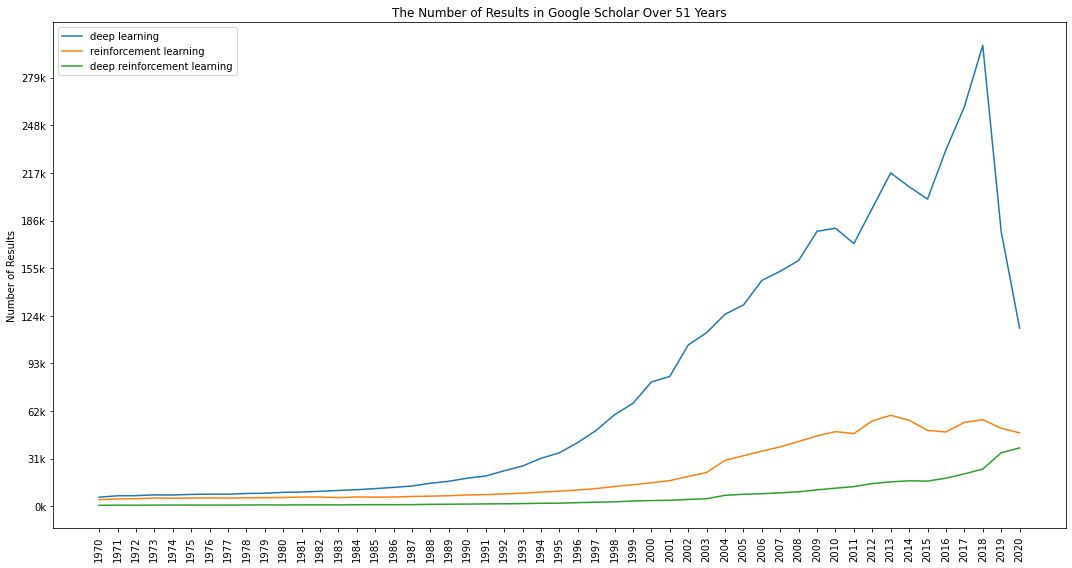

Image saved to E:\Dropbox\My Projects as [plot ['deep learning', 'reinforcement learning', 'deep reinforcement learning'].jpg].


In [10]:
new_cookies = 'NID=204=CStrJ5gNdpEXysoxzrDjrninEmOLPVivUx3BIzhMpSGrAuxx4rIpGGkhtF8WBFwE_Ku7xJSZynA2fZ3FnDf7dDteHWselKRXJQR8TKodnNIXq9zpu77Lqh58fkpBeiHGve-5vkSI8OT53vbkKKHkw6Y5nms2TDcD0xco34Bj58I; GSP=LM=1600891956:S=HXid8i3RMg92Z0oi'

trending_words = ["deep learning", "reinforcement learning", "deep reinforcement learning"]
trending_word_results = plot_terms(trending_words,start_year=1970, cookies=new_cookies)
trending_word_results
trending_word_results.to_csv("trending_word_results.csv",index=False)

In [ ]:
new_cookies = 'Cookie: NID=204='

trending_words = ["neural network"]
trending_word_results = plot_terms(trending_words,start_year=1990, cookies=new_cookies)
trending_word_results
trending_word_results.to_csv("trending_word_results.csv",index=False)

In [ ]:
result_nn_40_80 = plot_terms(["neural network"],start_year=1940, end_year=1980)
result_nn_40_80
result_nn_40_80.to_csv("result_nn_40_80.csv",index=False)

In [9]:
new_cookies = 'Cookie: NID=204='
new_cookies = new_cookies.replace("Cookie: ", "")
new_cookies

'NID=204=yuBm1lMQt-FOTtAEm7p0wGJThqdb3ZmkO4yioEByEEQlTcwFyLrlaEgIcWgbGT48fPGZozyMTSNVACj_n7EqxqW2lHAn8wrIQa0l68TBfIuQYsUdoBeKOOIojccdrYr3hg7-GUd_uywCuhu2yw4u0bmC1I_MezRhNEtD3320SXc; GSP=A=Mr1awQ:CPTS=1600224690:LM=1600224690:S=0vrzTBjbUfsWTRWo; GOOGLE_ABUSE_EXEMPTION=ID=124e36667224d103:TM=1600224661:C=r:IP=98.235.129.151-:S=APGng0vUsdzJV_W7oOj3X_R99oWUYGDORw; 1P_JAR=2020-09-16-00; ANID=AHWqTUk7qtpPQOzczAyLEtCdpPf8Eaw4brf03ig7dhikMAiPoiJhzXAAxj_YWX9F'

natural language processing 1940 17300
natural language processing 1941 5200
natural language processing 1942 5360
natural language processing 1943 5410
natural language processing 1944 5380
natural language processing 1945 4930
natural language processing 1946 5680
natural language processing 1947 6080
natural language processing 1948 6590
natural language processing 1949 7750
natural language processing 1950 21000
natural language processing 1951 8050
natural language processing 1952 7930
natural language processing 1953 8710
natural language processing 1954 8900
natural language processing 1955 9010
natural language processing 1956 9590
natural language processing 1957 10300
natural language processing 1958 11200
natural language processing 1959 11500
natural language processing 1960 26300
natural language processing 1961 10900
natural language processing 1962 12100
natural language processing 1963 12300
natural language processing 1964 12000
natural language processing 1965 13100
n

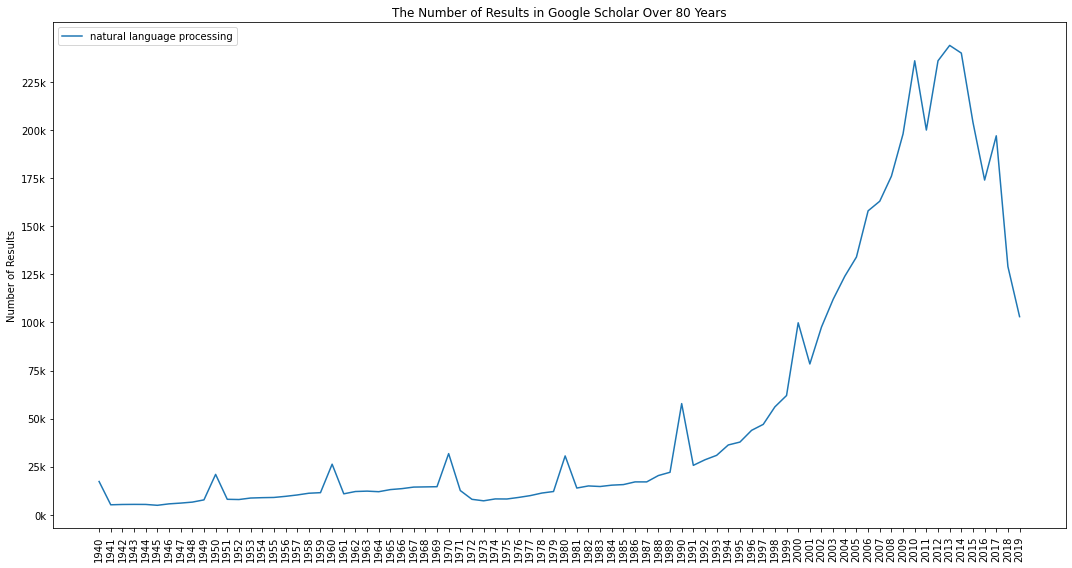

Image saved to E:\Dropbox\My Projects as [plot ['natural language processing'].jpg].


In [12]:
trending_words = ["natural language processing"]
trending_word_results = plot_terms(trending_words,start_year=1940, end_year=2020, cookies=new_cookies)
trending_word_results
trending_word_results.to_csv("result_nlp.csv",index=False)

In [ ]:
trending_words = ["neural network"]
trending_word_results = plot_terms(trending_words,start_year=1940, cookies=new_cookies)
trending_word_results
trending_word_results.to_csv("result_nn_40_80.csv",index=False)

.deep reinforcement learning 1940 20
.deep reinforcement learning 1941 17
.deep reinforcement learning 1942 29
.deep reinforcement learning 1943 25
.deep reinforcement learning 1944 21
.deep reinforcement learning 1945 26
.deep reinforcement learning 1946 25
.deep reinforcement learning 1947 29
.deep reinforcement learning 1948 34
.deep reinforcement learning 1949 42
.deep reinforcement learning 1950 45
.deep reinforcement learning 1951 49
.deep reinforcement learning 1952 56
.deep reinforcement learning 1953 44
.deep reinforcement learning 1954 68
.deep reinforcement learning 1955 58
.deep reinforcement learning 1956 73
.deep reinforcement learning 1957 73
.deep reinforcement learning 1958 88
.deep reinforcement learning 1959 91
.deep reinforcement learning 1960 103
.deep reinforcement learning 1961 126
.deep reinforcement learning 1962 171
.deep reinforcement learning 1963 187
.deep reinforcement learning 1964 239
.deep reinforcement learning 1965 238
.deep reinforcement learning 196

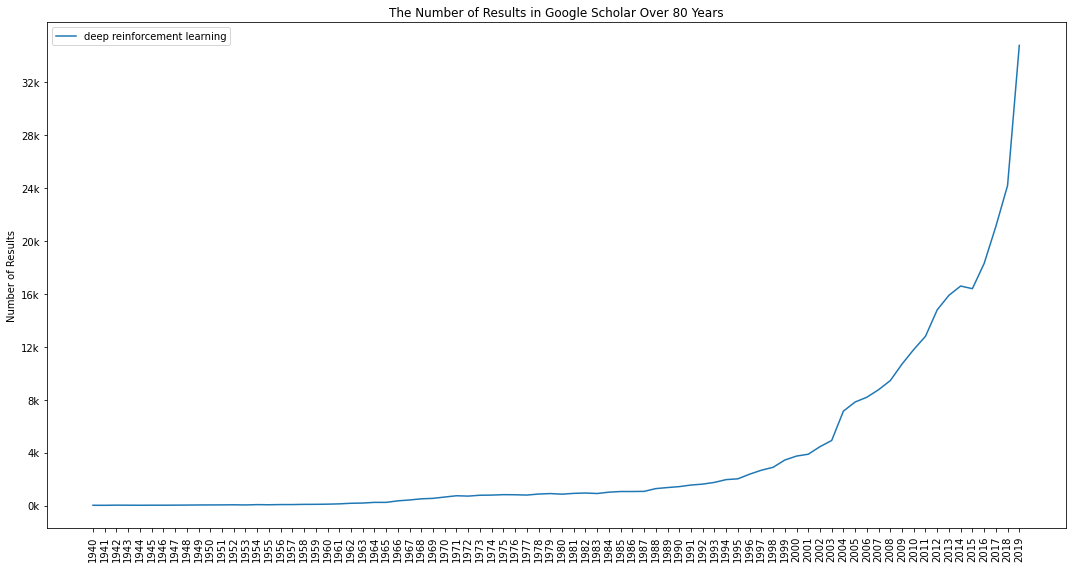

Image saved to E:\Dropbox\My Projects as [plot ['deep reinforcement learning'].jpg].


In [13]:
trending_words = ["deep reinforcement learning"]
trending_word_results = plot_terms(trending_words,start_year=1940, end_year=2020, cookies=new_cookies)
trending_word_results
trending_word_results.to_csv("result_drl.csv",index=False)